#### In this notebook we explore the correlation coefficient between ensemble ARMA time series and the original FMRI time series.

In [44]:
import pingouin as pg
import pandas as pd
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
import seaborn
import math


# Reading in Files

In [2]:
# Reading in Rscore files by stack and concatenate them
Rscore = pd.read_csv('E:/projects/connectome/results/HurstExp_ARMA_results_0_to_5/Rscore/Rscore_1.csv')
Rscore = Rscore.rename(columns={'Unnamed: 0':'ID'})
Rscore = Rscore.set_index('ID')
for i in range(2,21):
    file = 'E:/projects/connectome/results/HurstExp_ARMA_results_0_to_5/Rscore/Rscore_'+str(i)+'.csv'
    tmp = pd.read_csv(file)
    tmp = tmp.rename(columns={'Unnamed: 0':'ID'})
    tmp = tmp.set_index('ID')
    Rscore = pd.concat([Rscore, tmp],sort=True)

# sort regions by region number
for reg in Rscore:
    Rscore = Rscore.rename(columns={reg:int(reg.strip('region '))})
Rscore = Rscore.sort_index(axis=1)
for reg in Rscore:
    Rscore = Rscore.rename(columns={reg:'region '+str(reg)})

In [4]:
# sort by subject ID and save to file
Rscore.to_csv('E:/projects/connectome/results/HurstExp_ARMA_results_0_to_5/Rscore/Rscore_all.csv',index=True)

In [8]:
# sort by subject ID and save to file
Rscore.to_csv('E:/projects/connectome/results/HurstExp_ARMA_results_0_to_5/Rscore/Rscore_all.csv',index=True)

Take a glance at the correlations

In [5]:
Rscore

,region 1,region 2,region 3,region 4,region 5,region 6,region 7,region 8,region 9,region 10,...,region 151,region 152,region 153,region 154,region 155,region 156,region 157,region 158,region 159,region 160
ID,,,,,,,,,,,,,,,,,,,,,
sub195849,0.787179,0.609347,0.125982,0.396537,0.535376,0.588063,0.444817,0.604696,0.539948,0.540861,...,0.068804,0.192319,0.108825,0.191668,0.126340,0.142182,0.172938,0.113520,0.104563,0.150983
sub522434,0.678416,0.449991,0.180914,0.585840,0.377821,0.620476,0.399975,0.485845,0.517155,0.546814,...,0.118526,0.151692,0.104043,0.421578,0.352397,0.138755,0.457138,0.116007,0.099211,0.157616
sub157336,0.341658,0.265576,0.146795,0.462024,0.178091,0.562336,0.136408,0.132235,0.527664,0.160168,...,0.111016,0.044261,0.117262,0.202766,0.115383,0.045722,0.151589,0.126104,0.090075,0.141942
sub720337,0.541226,0.297680,0.155659,0.454185,0.249582,0.514190,0.156354,0.304415,0.632377,0.295543,...,0.115709,0.085528,0.143312,0.186536,0.135463,0.073911,0.263621,0.159813,0.103218,0.210716
sub138837,0.789843,0.649310,0.092441,0.745803,0.666956,0.686777,0.668036,0.720919,0.784802,0.712026,...,0.242309,0.318393,0.139448,0.228334,0.143099,0.125763,0.214592,0.460384,0.202810,0.360947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub826454,0.618833,0.335548,0.116228,0.414756,0.219122,0.374499,0.194808,0.318771,0.362074,0.497079,...,0.165149,0.221244,0.135991,0.360084,0.181211,0.098651,0.224216,0.142985,0.121201,0.109198
sub810843,0.373145,0.171167,0.085088,0.365400,0.275944,0.305392,0.383608,0.304727,0.248029,0.377702,...,0.155266,0.152556,0.103759,0.394009,0.099121,0.117534,0.127764,0.157335,0.111576,0.119172
sub139233,0.616980,0.261059,0.145034,0.479626,0.180392,0.291203,0.209086,0.330316,0.435713,0.313161,...,0.062114,0.159783,0.133565,0.171983,0.126931,0.145934,0.294339,0.090757,0.138608,0.134240


Visualize with heatmap

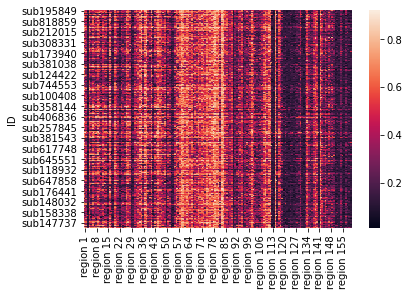

In [8]:
seaborn.heatmap(Rscore)
plt.show()

#### Making sure that no-negative correlation

In [9]:
for reg in Rscore:
    for sub in Rscore.index:
        if Rscore[reg].loc[sub]<0:
            print("Sub {} Reg {} Rscore {}".format(sub, reg,Rscore[reg].loc[sub]))

# Performing Significance Tests

#### Since some regions negative correlations, even though there is only a small number of those, we want to see if the mean of each regions are still significant. Once this is established, we set out to use the absolute correlation. 

In [11]:
ttests = [] # whether the mean of correlations of each region is siginificant from zero
for i in range(1,161):
    reg = 'region '+str(i)
    ttests.append(scipy.stats.ttest_1samp(Rscore[reg],0))
    
ttest_significant = []
for ttest in ttests:
    ttest_significant.append(ttest[1]<0.01)
print("By T-tests, the number of significant regions is: {}".format(sum(ttest_significant)))

By T-tests, the number of significant regions is: 160


In [13]:
wtests = [] # whether the mean of correlations of each region is siginificant from zero
for i in range(1,161):
    reg = 'region '+str(i)
    wtests.append(scipy.stats.wilcoxon(Rscore[reg]))
    
wtest_significant = []
for wtest in wtests:
    wtest_significant.append(wtest[1]<0.01)
print("By Wilcoxon tests, the number of significant regions is: {}".format(sum(wtest_significant)))

By Wilcoxon tests, the number of significant regions is: 160


# Compute Average Correlation

#### We will utilize five different variance stabilizing transformations to facilitate the computation of average correlations. Brute force arithmetic averaging would not make much sense statistically. The easiet example of arithmetically averaging correlations to produce non-sensical result is r1=0.5 and r2=-0.5. In fact, since correlations are not normally distributed, we cannot take arithmetic average. By using stabilizing transformations, we wish to make the distribution of our correlations closer to normal (yet still not quite as indicated by the normality test). At least, now  the averages obtained would not sound as absurd. 

In [14]:
# Ideas of the following VST's: (1) transform data (2)compute average for the transformed data (3)inverse-transform the average
def fisherAvg(corrs):
    z = 0.5*np.log((1+corrs)/(1-corrs))
    avg_z = sum(z)/len(corrs)
    return (math.exp(2*avg_z) - 1) / (math.exp(2*avg_z) + 1)

def squareAvg(corrs):
    return math.sqrt(sum(corrs**2)/len(corrs))

def rootAvg(corrs):
    return (sum(corrs**0.5)/len(corrs))**2

def arccosAvg(corrs):
    return np.cos(sum(np.arccos(corrs))/len(corrs))

def harmonicAvg(corrs):
    return 1/(sum(1/np.arcsin(corrs))/len(corrs))

def geomAvg(corrs):
    return np.exp(sum(np.log(corrs))/len(corrs))

def arsinhAvg(corrs):
    return np.sum(np.log(corrs+(corrs**2+1)**0.5))/len(corrs)

In [15]:
fisher_avg = []
square_avg = []
root_avg = []
arccos_avg = []
geom_avg = []
harmonic_avg = []
arsinh_avg = []

In [16]:
for i in range(1,161):
    reg = 'region '+str(i)
    fisher_avg.append(fisherAvg(Rscore[reg]))
    square_avg.append(squareAvg(Rscore[reg]))
    root_avg.append(rootAvg(Rscore[reg]))
    arccos_avg.append(arccosAvg(Rscore[reg]))
    harmonic_avg.append(harmonicAvg(Rscore[reg]))
    geom_avg.append(geomAvg(Rscore[reg]))
    arsinh_avg.append(arsinhAvg(Rscore[reg]))

#### These three averaging methods only work for positive correlations

In [17]:
avg_corr_dict = {}
for i in range(160):
    reg = 'region '+str(i+1)
    avg_corr_dict[reg] = [square_avg[i]]
square_avg = pd.DataFrame(avg_corr_dict,index=['square_avg'])

avg_corr_dict = {}
for i in range(160):
    reg = 'region '+str(i+1)
    avg_corr_dict[reg] = [root_avg[i]]
root_avg = pd.DataFrame(avg_corr_dict,index=['root_avg'])

avg_corr_dict = {}
for i in range(160):
    reg = 'region '+str(i+1)
    avg_corr_dict[reg] = [geom_avg[i]]
geom_avg = pd.DataFrame(avg_corr_dict,index=['geom_avg'])

In [18]:
avg_corr_dict = {}
for i in range(160):
    reg = 'region '+str(i+1)
    avg_corr_dict[reg] = [fisher_avg[i]]
fisher_avg = pd.DataFrame(avg_corr_dict,index=['fisher_avg'])


avg_corr_dict = {}
for i in range(160):
    reg = 'region '+str(i+1)
    avg_corr_dict[reg] = [arccos_avg[i]]
arccos_avg = pd.DataFrame(avg_corr_dict,index=['arccos_avg'])


avg_corr_dict = {}
for i in range(160):
    reg = 'region '+str(i+1)
    avg_corr_dict[reg] = [arsinh_avg[i]]
arsinh_avg = pd.DataFrame(avg_corr_dict,index=['arsinh_avg'])

#### Now lump everything into a singe dataframe for convenient viewing

In [33]:
averages = pd.concat([fisher_avg,arccos_avg,arsinh_avg,geom_avg,square_avg,root_avg],axis=0)

In [34]:
averages

,region 1,region 2,region 3,region 4,region 5,region 6,region 7,region 8,region 9,region 10,...,region 151,region 152,region 153,region 154,region 155,region 156,region 157,region 158,region 159,region 160
fisher_avg,0.538947,0.390228,0.129839,0.509327,0.325903,0.487945,0.382559,0.374928,0.528593,0.433918,...,0.134476,0.166466,0.144127,0.270861,0.150969,0.131683,0.241024,0.156993,0.157541,0.147093
arccos_avg,0.523484,0.383054,0.129688,0.499096,0.318956,0.474285,0.373946,0.366521,0.514548,0.424208,...,0.134196,0.165966,0.143870,0.269146,0.150647,0.131486,0.239182,0.156622,0.157099,0.146670
arsinh_avg,0.482711,0.364154,0.129045,0.467034,0.303822,0.440454,0.353944,0.346941,0.476542,0.399164,...,0.133284,0.164307,0.142900,0.263101,0.149493,0.130742,0.233852,0.155311,0.155650,0.145393
geom_avg,0.462064,0.341057,0.122843,0.455688,0.270586,0.413886,0.325188,0.314355,0.459501,0.373519,...,0.124767,0.152823,0.134998,0.246981,0.140400,0.123274,0.213785,0.146257,0.144850,0.135524
square_avg,0.545739,0.408756,0.136520,0.517156,0.354115,0.500902,0.404216,0.399095,0.535526,0.451135,...,0.144696,0.179087,0.153153,0.286249,0.160971,0.139970,0.261015,0.167577,0.169938,0.159301
root_avg,0.487053,0.359079,0.126207,0.473453,0.291464,0.438910,0.345957,0.336955,0.481630,0.395052,...,0.129213,0.159055,0.139220,0.257514,0.145331,0.127245,0.225538,0.151115,0.150597,0.140686


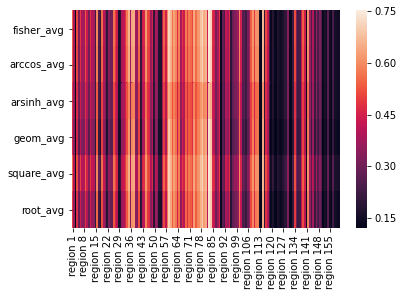

In [35]:
seaborn.heatmap(averages)
plt.show()

# Tests for Regions with High Correlation

In [21]:
ttests = [] # whether the mean of correlations of each region is siginificant from zero
for i in range(1,161):
    reg = 'region '+str(i)
    ttests.append(scipy.stats.ttest_1samp(Rscore[reg],0.5))

In [22]:
for j in range(5,10): 
    ttest_high_corr = []
    for i,ttest in enumerate(ttests):
        if fisher_avg['region '+str(i+1)].loc['fisher_avg']>j/10 and ttest[1]<0.05:
            ttest_high_corr.append(1)
        else:
            ttest_high_corr.append(0)
    print("By T-tests, the number of regions with average correlation greater than {} is: {}".format(j/10,sum(ttest_high_corr)))

By T-tests, the number of regions with average correlation greater than 0.5 is: 39
By T-tests, the number of regions with average correlation greater than 0.6 is: 22
By T-tests, the number of regions with average correlation greater than 0.7 is: 4
By T-tests, the number of regions with average correlation greater than 0.8 is: 0
By T-tests, the number of regions with average correlation greater than 0.9 is: 0


In [23]:
for j in range(5,10): 
    wtests = [] # whether the mean of correlations of each region is siginificant from zero
    for i in range(1,161):
        reg = 'region '+str(i)
        wtests.append(scipy.stats.wilcoxon(Rscore[reg],[j/10]*820))
        
    wtest_high_corr = []
    for i,wtest in enumerate(wtests):
        if fisher_avg['region '+str(i+1)].loc['fisher_avg']>j/10 and wtest[1]<0.05:
            wtest_high_corr.append(1)
        else:
            wtest_high_corr.append(0)
    print("By Wilcoxon tests, the number of regions with average correlation greater than {} is: {}".format(j/10,sum(wtest_high_corr)))

By Wilcoxon tests, the number of regions with average correlation greater than 0.5 is: 38
By Wilcoxon tests, the number of regions with average correlation greater than 0.6 is: 16
By Wilcoxon tests, the number of regions with average correlation greater than 0.7 is: 4
By Wilcoxon tests, the number of regions with average correlation greater than 0.8 is: 0
By Wilcoxon tests, the number of regions with average correlation greater than 0.9 is: 0


# Extract the Regions with the Highest Correlations

In [24]:
top_n = 15 # top 10 regions with the highest correlations to the original time-series
col_names = ['top '+str(i+1) for i in range(top_n)] 
top_n_regions = pd.DataFrame(columns=col_names) # get the most correlated regions out based on each averaging methods

In [29]:
avg_methods = ['arccos_avg','fisher_avg','arsinh_avg']
n = 15
top_n_regions = []
for j,avg_method in enumerate(avg_methods):
    tmp = {}
    # use double brackets [[]] in .loc to extract a row/columns in the form of dataframe;
    # otherwise, if used only single bracket [], that row would be extracted a series a lose index/column names 
    sorted_avg = averages.loc[[avg_method]].T.sort_values(by=avg_method,ascending=False)[:n].T
    cols = sorted_avg.columns
    for i,col in enumerate(cols):
        # to create a dataframe with tuple entries, wrap the tuples in a list
        # so dict[key]=[(tuple)] then pd.DataFrame(dict) 
        tmp['top '+str(i+1)]=[(col,round(sorted_avg[col].values[0],3))] # round the correlation to 3 decimal digts
    top_n_regions.append(pd.DataFrame(tmp,index=[avg_method]))

In [30]:
pd.concat(top_n_regions,axis=0)

,top 1,top 2,top 3,top 4,top 5,top 6,top 7,top 8,top 9,top 10,top 11,top 12,top 13,top 14,top 15
arccos_avg,"(region 83, 0.746)","(region 84, 0.712)","(region 79, 0.709)","(region 59, 0.709)","(region 78, 0.673)","(region 81, 0.662)","(region 115, 0.658)","(region 60, 0.655)","(region 35, 0.649)","(region 38, 0.641)","(region 80, 0.639)","(region 74, 0.637)","(region 37, 0.631)","(region 62, 0.627)","(region 77, 0.612)"
fisher_avg,"(region 83, 0.752)","(region 84, 0.718)","(region 79, 0.717)","(region 59, 0.716)","(region 78, 0.685)","(region 81, 0.669)","(region 115, 0.666)","(region 60, 0.664)","(region 35, 0.661)","(region 38, 0.651)","(region 80, 0.647)","(region 74, 0.643)","(region 37, 0.642)","(region 62, 0.635)","(region 77, 0.62)"
arsinh_avg,"(region 83, 0.684)","(region 84, 0.655)","(region 59, 0.652)","(region 79, 0.652)","(region 78, 0.616)","(region 81, 0.613)","(region 115, 0.61)","(region 60, 0.606)","(region 35, 0.596)","(region 80, 0.593)","(region 74, 0.592)","(region 38, 0.592)","(region 62, 0.583)","(region 37, 0.582)","(region 77, 0.57)"


# Variance of Correlations

In [42]:
variance = [] # variance of the correlations of each region
for i in range(1,161):
    reg = 'region '+str(i)
    variance.append(np.var(Rscore[reg]))

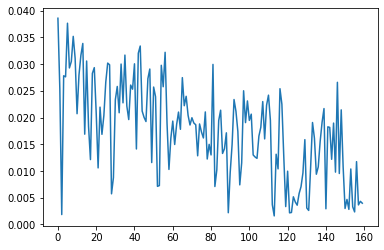

In [43]:
plt.plot(variance)
plt.show()

# Plotting the Ensemble Time-series on top of the Original

In [38]:
def plotTS(sub,reg,start,end):
    # sub: subject ID
    # reg: region number
    # start, end: starting point and end point of the time-series that is to be plotted
    fitted_file = 'E:/projects/connectome/results/HurstExp_ARMA_results_0_to_5/ensemble_ts/ensemble_ts_'+str(sub)+'.mat'
    fitted_matrix = scipy.io.loadmat(fitted_file)
    fitted_ts = fitted_matrix['ensemble_ts'][reg-1][start:end]
    original_file = 'E:/projects/connectome/data/FMRI_820subjects/DOS160_TC_HCP_REST1RL_'+str(sub)+'.mat'
    original_matrix = scipy.io.loadmat(original_file)
    original_ts = original_matrix['tc'][:,reg-1][start:end]
    plt.plot(fitted_ts, color='g',label='fitted_ensemble')
    plt.plot(original_ts, color='r', label='original' )
    plt.legend()
    plt.show()

In [39]:
sub = 100206
sub_file= 'E:/projects/connectome/results/HurstExp_ARMA_results_0_to_5/ensemble_ts/ensemble_ts_'+str(sub)+'.mat'
sub_mat = scipy.io.loadmat(sub_file)

original_file = 'E:/projects/connectome/data/FMRI_820subjects/DOS160_TC_HCP_REST1RL_'+str(sub)+'.mat'
original_matrix = scipy.io.loadmat(original_file)

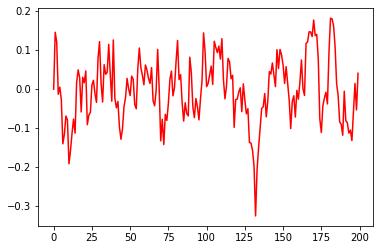

In [124]:
fitted = sub_mat['ensemble_ts'][0][0:200]
plt.plot(fitted,color='r',label='ensemble_ARMA')

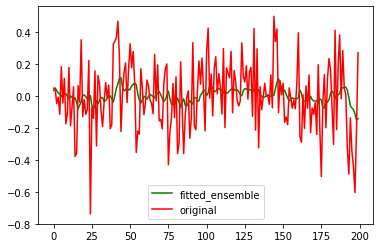

In [67]:
plotTS(173940,100,400,600)

In [291]:
for i in range(1,161):
    reg = 'region '+str(i)
    square_r = (Rscore[reg])**2
    fisher_r = 0.5*np.log((1+Rscore[reg])/(1-Rscore[reg]))
    arcsin_r = np.arccos(Rscore[reg])
    if scipy.stats.kstest(arccos_r,'norm')[1]>0.05:
        print('region {} is normal'.format(i))